In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd 

In [3]:
#from sklearn.datasets import make_blobs

In [4]:
path= 'E:\\University courses\\datamining machine learning\\'
df= pd.read_csv(path+"weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df=df.drop(['Date','Evaporation', 'Sunshine','Cloud9am','Cloud3pm','Date'],axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [6]:
corr=df.corr()

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Location']=le.fit_transform(df.Location)
df['WindGustDir']=le.fit_transform(df.WindGustDir)
df['WindDir9am']=le.fit_transform(df.WindDir9am)
df['WindDir3pm']=le.fit_transform(df.WindDir3pm)
df['RainToday']=le.fit_transform(df.RainToday)
df['RainTomorrow']=le.fit_transform(df.RainTomorrow)

In [8]:
from numpy import NaN
df[np.isnan(df)]=0

In [9]:
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']



In [10]:
from sklearn.cluster import KMeans

In [11]:
X.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.793524,12.069546,23.020041,2.307990,8.306565,37.210525,7.943826,8.002317,13.872831,18.269799,67.624062,49.942204,912.253980,910.366122,16.784235,21.145405,0.264004
std,14.228687,6.482693,7.407808,8.389771,4.971722,16.649265,4.921740,4.739865,8.993610,9.119006,20.987869,22.334356,310.151281,309.084382,6.712427,7.635396,0.489024
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,11.000000,7.500000,17.800000,0.000000,4.000000,30.000000,3.000000,4.000000,7.000000,11.000000,56.000000,35.000000,1010.900000,1008.400000,12.100000,16.200000,0.000000
50%,24.000000,11.900000,22.500000,0.000000,9.000000,37.000000,8.000000,8.000000,13.000000,17.000000,69.000000,51.000000,1016.600000,1014.200000,16.600000,20.900000,0.000000
75%,36.000000,16.800000,28.200000,0.600000,13.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,0.000000
max,48.000000,33.900000,48.100000,371.000000,16.000000,135.000000,16.000000,16.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,2.000000


In [13]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
data_df = pd.DataFrame(X)
target= pd.DataFrame(y)
data_df.columns=['location','MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir','WindGustSpeed', 'WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am', 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
target.columns =['RainTomorrow']

Text(0.5, 1.0, 'K means Classifcation')

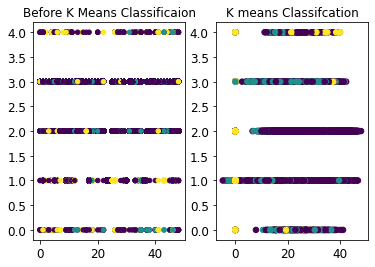

In [14]:
colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
#'','MinTemp', '', 'Rainfall', 'WindGustDir','WindGustSpeed', 'WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am', 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday'
plt.scatter(x=data_df["location"] ,y= y_pred,c = y,s=20)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=data_df["MaxTemp"] ,y=y_pred,c = y,s=30)
plt.title("K means Classifcation")

In [15]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=len(y), centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [17]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [18]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [19]:
y_pred is kmeans.labels_

True

In [20]:
kmeans.cluster_centers_

array([[ 2.29776786e+01,  1.29303571e+01,  2.19718750e+01,
         4.06875000e+00,  1.01473214e+01,  2.69419643e+01,
         8.27678571e+00,  1.36250000e+01,  1.30267857e+01,
         6.01339286e+00,  6.92901786e+01,  1.49017857e+01,
         1.01705000e+03, -4.54747351e-13,  1.77044643e+01,
         6.48750000e+00,  3.61607143e-01],
       [ 2.61906917e+01,  8.91797487e+00,  1.96680424e+01,
         2.23213321e+00,  1.02516212e+01,  2.78372737e+01,
         9.53789516e+00,  9.32666847e+00,  1.02545258e+01,
         1.26617131e+01,  6.54585247e+01,  4.65450554e+01,
         8.00355338e-11, -3.68345354e-11,  1.34305661e+01,
         1.70074034e+01,  3.45379627e-01],
       [ 2.27919811e+01,  1.34207562e+01,  2.75438716e+01,
         5.23061800e-01,  7.69282707e+00,  4.18008778e+01,
         6.65795536e+00,  7.93796171e+00,  1.61576178e+01,
         1.94981531e+01,  5.04991262e+01,  3.02902534e+01,
         1.01653561e+03,  1.01362486e+03,  1.96720133e+01,
         2.53652673e+01,  9.9

In [21]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [22]:
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [26]:
print(kmeans)

KMeans(n_clusters=5, random_state=42)


In [27]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

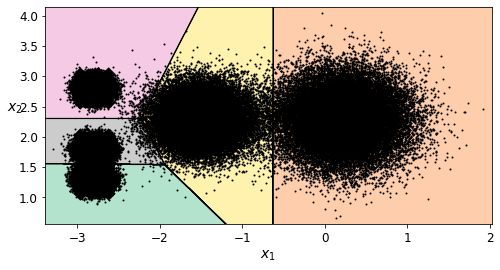

In [28]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
#soft clustering

In [29]:
kmeans.transform(X_new)

array([[2.88641327, 0.3683301 , 2.90554949, 1.50749077, 2.80074015],
       [5.84243611, 2.79881577, 5.84844155, 4.48723444, 5.79713886],
       [1.71087847, 3.29284001, 0.28839811, 1.67561274, 1.21497322],
       [1.21569087, 3.22341122, 0.36286409, 1.53581607, 0.72719727]])

In [30]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.88641327, 0.3683301 , 2.90554949, 1.50749077, 2.80074015],
       [5.84243611, 2.79881577, 5.84844155, 4.48723444, 5.79713886],
       [1.71087847, 3.29284001, 0.28839811, 1.67561274, 1.21497322],
       [1.21569087, 3.22341122, 0.36286409, 1.53581607, 0.72719727]])

In [31]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

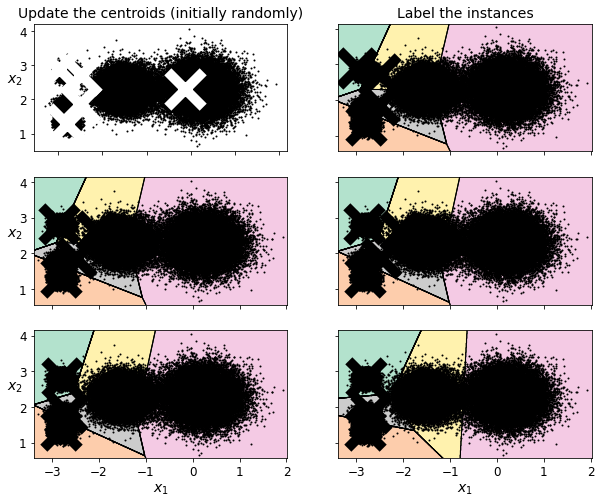

In [32]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [33]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

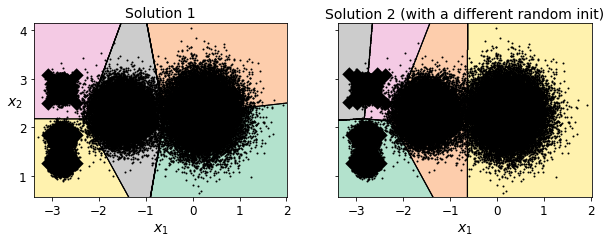

In [34]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=64)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

In [35]:
#inertia
kmeans.inertia_

15748.844598419837

In [36]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

15748.844598419835

In [37]:
kmeans.score(X)

-15748.844598419835

In [38]:
#multiple initializing
kmeans_rnd_init1.inertia_

16501.859202635802

In [39]:
kmeans_rnd_init2.inertia_

19191.78545282434

In [40]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

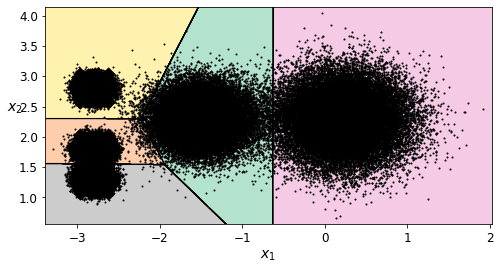

In [41]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

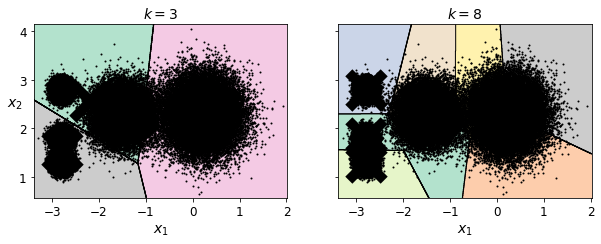

In [42]:
#Finding the optimal number of clusters
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [43]:
kmeans_k3.inertia_

46887.87926312356

In [44]:
kmeans_k8.inertia_

9269.552695497172

In [45]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

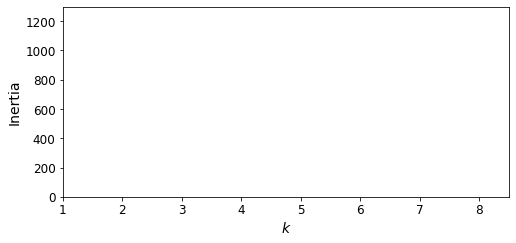

In [47]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

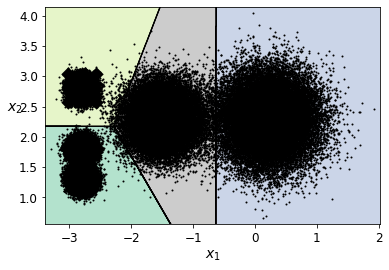

In [48]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [51]:
X1, y1 = make_blobs(n_samples=1500, centers=((6, -6), (0, 0)), random_state=30)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

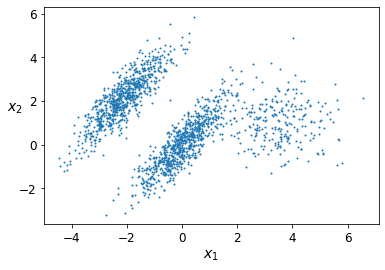

In [52]:
plot_clusters(X)

In [53]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

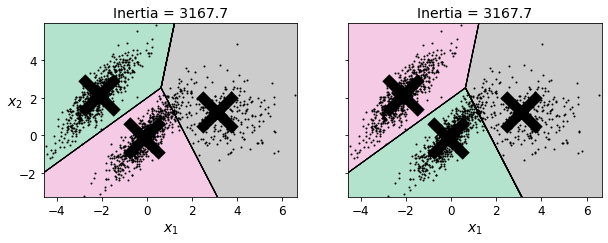

In [54]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)


plt.show()

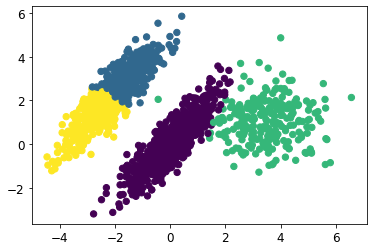

In [55]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [56]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

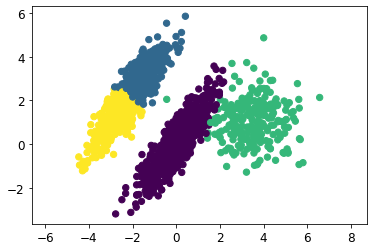

In [57]:
gmm = mixture.GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)